In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('💲Rentabilité finale.xlsx')



In [2]:
df_to_predict = df[df['RAF'] > 0]
X = pd.get_dummies(df_to_predict)
y = df['RAF']
#print(df_to_predict)
#print(y)

     Project Additional Budget Class
0   Projet A                       B
1   Projet B                       B
2   Projet C                       A
3   Projet D                       D
4   Projet E                       A
5   Projet G                       C
6   Projet H                       A
7   Projet I                       B
8   Projet L                       A
9   Projet M                       B
10  Projet N                       A
11  Projet O                       B
12  Projet P                       A
13  Projet Q                       C
14  Projet R                       A
15  Projet S                       A
16  Projet T                       C
17  Projet U                       B
18  Projet X                       D
19  Projet Y                       C


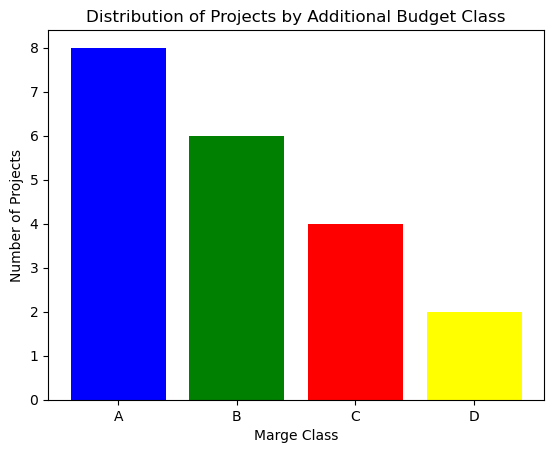

In [3]:
additional_budget_per_project = df.groupby('Projet')['Marge'].sum()
additional_budget_per_project_class = []

for budget in additional_budget_per_project:
    if budget >=0:
        additional_budget_per_project_class.append('A')
    elif budget >= -15:
        additional_budget_per_project_class.append('B')
    elif budget >= -30:
        additional_budget_per_project_class.append('C')
    else:
        additional_budget_per_project_class.append('D')
project_class_dict = {
    project: budget_class for project, budget_class in zip(additional_budget_per_project.index, additional_budget_per_project_class)
}

# Convert the dictionary into a DataFrame
new_df = pd.DataFrame(list(project_class_dict.items()), columns=['Project', 'Additional Budget Class'])

print(new_df)


# Count the number of projects in each class
class_counts = new_df['Additional Budget Class'].value_counts()

# Create a bar chart
plt.bar(class_counts.index, class_counts.values, color=['blue', 'green', 'red','yellow'])
plt.xlabel('Marge Class')
plt.ylabel('Number of Projects')
plt.title('Distribution of Projects by Additional Budget Class')
plt.show()

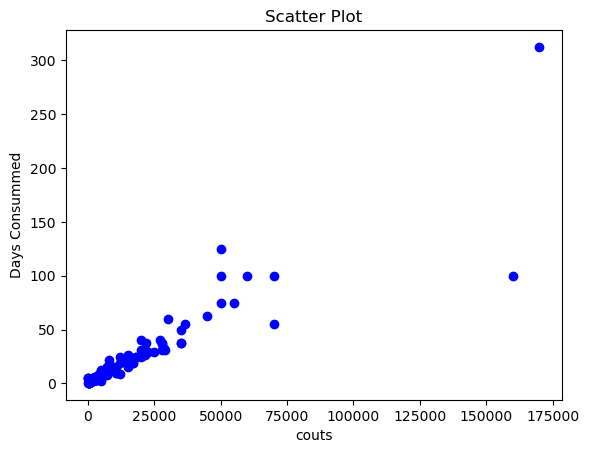

In [4]:

x=df['Couts']
y=df['Consommés(J)']
# Add labels and title
plt.scatter(x, y, color='blue')
plt.xlabel('couts')
plt.ylabel('Days Consummed')
plt.title('Scatter Plot')

# Show plot
plt.show()

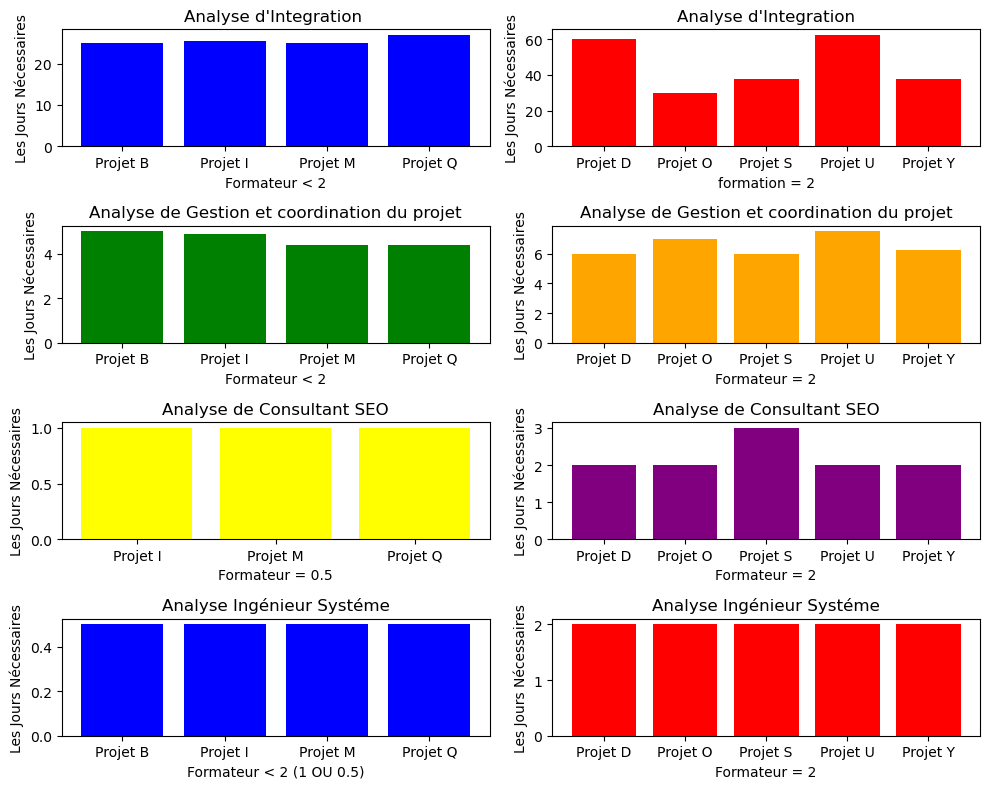

In [5]:
formateur_Under_2 = df[(df['Ressources'] == 'Formation') & (df['Attérissage'] < 2) &(df['Type de projet'] == 'DRUPAL')]
formateur_min_2 = df[(df['Ressources'] == 'Formation') & (df['Attérissage'] >= 2) &(df['Type de projet'] == 'DRUPAL')]
formateur_Eq_05 = df[(df['Ressources'] == 'Formation') & (df['Attérissage'] == 0.5) &(df['Type de projet'] == 'DRUPAL')]
formateur_Eq_1 = df[(df['Ressources'] == 'Formation') & (df['Attérissage'] == 1) &(df['Type de projet'] == 'DRUPAL')]

project_FU2 = formateur_Under_2['Projet'].unique()
project_FG2 = formateur_min_2['Projet'].unique()
project_FE05 = formateur_Eq_05['Projet'].unique()
project_FE1 = formateur_Eq_1['Projet'].unique()


integration_resources_U2 = df[(df['Projet'].isin(project_FU2)) & (df['Ressources'] == 'Intégration')]
integration_resources_FG2 = df[(df['Projet'].isin(project_FG2)) & (df['Ressources'] == 'Intégration')]
GPC_resources_U2 = df[(df['Projet'].isin(project_FU2)) & (df['Ressources'] == 'Gestion et coordination du projet')]
GPC_resources_E2 = df[(df['Projet'].isin(project_FG2)) & (df['Ressources'] == 'Gestion et coordination du projet')]
SEO_resources_E05= df[(df['Projet'].isin(project_FE05)) & (df['Ressources'] == 'Consultant SEO')]
SEO_resources_E2 = df[(df['Projet'].isin(project_FG2)) & (df['Ressources'] == 'Consultant SEO')]
IS_resources_E2 = df[(df['Projet'].isin(project_FG2)) & (df['Ressources'] == 'Ingénieur système')]
IS_resources_U2 = df[(df['Projet'].isin(project_FU2)) & (df['Ressources'] == 'Ingénieur système')]




# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 8))

# Plot 1: Drupal
ax1 = axes[0, 0]

bars=ax1.bar(integration_resources_U2['Projet'], integration_resources_U2['Attérissage'], color='blue')

ax1.set_xlabel('Formateur < 2')
ax1.set_ylabel('Les Jours Nécessaires')
ax1.set_title('Analyse d\'Integration ')


# Plot 2: Spécifique
ax2 = axes[0, 1]
ax2.bar(integration_resources_FG2['Projet'], integration_resources_FG2['Attérissage'], color='red')
ax2.set_xlabel('formation = 2')
ax2.set_ylabel('Les Jours Nécessaires')
ax2.set_title('Analyse d\'Integration')
# Plot 3: Application mobile
ax3 = axes[1, 0]
ax3.bar(GPC_resources_U2['Projet'], GPC_resources_U2['Attérissage'], color='green')
ax3.set_xlabel('Formateur < 2')
ax3.set_ylabel('Les Jours Nécessaires')
ax3.set_title('Analyse de Gestion et coordination du projet')

# Plot 4: Prestashop
ax4 = axes[1, 1]
ax4.bar(GPC_resources_E2['Projet'], GPC_resources_E2['Attérissage'], color='orange')
ax4.set_xlabel('Formateur = 2')
ax4.set_ylabel('Les Jours Nécessaires')
ax4.set_title('Analyse de Gestion et coordination du projet')

# Plot 5: Prestashop
ax4 = axes[2, 0]
ax4.bar(SEO_resources_E05['Projet'], SEO_resources_E05['Attérissage'], color='yellow')
ax4.set_xlabel('Formateur = 0.5')
ax4.set_ylabel('Les Jours Nécessaires')
ax4.set_title('Analyse de Consultant SEO')

# Plot 6: Prestashop
ax4 = axes[2, 1]
ax4.bar(SEO_resources_E2['Projet'], SEO_resources_E2['Attérissage'], color='purple')
ax4.set_xlabel('Formateur = 2')
ax4.set_ylabel('Les Jours Nécessaires')
ax4.set_title('Analyse de Consultant SEO')

# Plot 7: Prestashop
ax4 = axes[3, 0]
ax4.bar(IS_resources_U2['Projet'], IS_resources_U2['Attérissage'], color='blue')
ax4.set_xlabel('Formateur < 2 (1 OU 0.5)')
ax4.set_ylabel('Les Jours Nécessaires')
ax4.set_title('Analyse Ingénieur Systéme')

# Plot 8: Prestashop
ax4 = axes[3, 1]
ax4.bar(IS_resources_E2['Projet'], IS_resources_E2['Attérissage'], color='red')
ax4.set_xlabel('Formateur = 2')
ax4.set_ylabel('Les Jours Nécessaires')
ax4.set_title('Analyse Ingénieur Systéme')
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

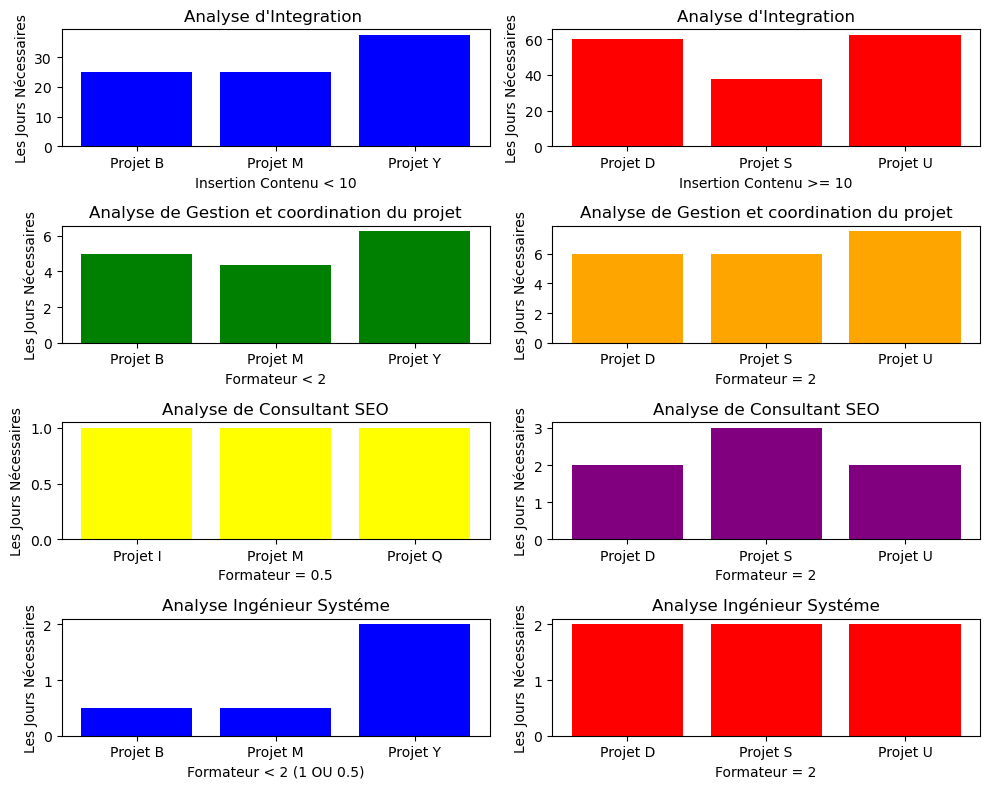

In [6]:
IC_Under_10 = df[(df['Ressources'] == 'Insertion contenu') & (df['Attérissage'] < 10) &(df['Type de projet'] == 'DRUPAL')&(df['RAF'] == 0)]
IC_min_10 = df[(df['Ressources'] == 'Insertion contenu') & (df['Attérissage'] >= 10) &(df['Type de projet'] == 'DRUPAL')&(df['RAF'] == 0)]
formateur_Eq_05 = df[(df['Ressources'] == 'Formation') & (df['Attérissage'] == 0.5) &(df['Type de projet'] == 'DRUPAL')]
formateur_Eq_1 = df[(df['Ressources'] == 'Formation') & (df['Attérissage'] == 1) &(df['Type de projet'] == 'DRUPAL')]

project_ICU10 = IC_Under_10['Projet'].unique()
project_ICG10 = IC_min_10['Projet'].unique()
project_FE05 = formateur_Eq_05['Projet'].unique()
project_FE1 = formateur_Eq_1['Projet'].unique()


integration_resources_ICU10 = df[(df['Projet'].isin(project_ICU10)) & (df['Ressources'] == 'Intégration') &(df['RAF'] == 0)]
integration_resources_ICG10 = df[(df['Projet'].isin(project_ICG10)) & (df['Ressources'] == 'Intégration') &(df['RAF'] == 0)]
GPC_resources_U2 = df[(df['Projet'].isin(project_ICU10)) & (df['Ressources'] == 'Gestion et coordination du projet')]
GPC_resources_E2 = df[(df['Projet'].isin(project_ICG10)) & (df['Ressources'] == 'Gestion et coordination du projet')]
SEO_resources_E05= df[(df['Projet'].isin(project_FE05)) & (df['Ressources'] == 'Consultant SEO')]
SEO_resources_E2 = df[(df['Projet'].isin(project_ICG10)) & (df['Ressources'] == 'Consultant SEO')]
IS_resources_E2 = df[(df['Projet'].isin(project_ICG10)) & (df['Ressources'] == 'Ingénieur système')]
IS_resources_U2 = df[(df['Projet'].isin(project_ICU10)) & (df['Ressources'] == 'Ingénieur système')]




# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 8))

# Plot 1: Drupal
ax1 = axes[0, 0]

bars=ax1.bar(integration_resources_ICU10['Projet'], integration_resources_ICU10['Attérissage'], color='blue')

ax1.set_xlabel('Insertion Contenu < 10')
ax1.set_ylabel('Les Jours Nécessaires')
ax1.set_title('Analyse d\'Integration ')


# Plot 2: Spécifique
ax2 = axes[0, 1]
ax2.bar(integration_resources_ICG10['Projet'], integration_resources_ICG10['Attérissage'], color='red')
ax2.set_xlabel('Insertion Contenu >= 10')
ax2.set_ylabel('Les Jours Nécessaires')
ax2.set_title('Analyse d\'Integration')
# Plot 3: Application mobile
ax3 = axes[1, 0]
ax3.bar(GPC_resources_U2['Projet'], GPC_resources_U2['Attérissage'], color='green')
ax3.set_xlabel('Formateur < 2')
ax3.set_ylabel('Les Jours Nécessaires')
ax3.set_title('Analyse de Gestion et coordination du projet')

# Plot 4: Prestashop
ax4 = axes[1, 1]
ax4.bar(GPC_resources_E2['Projet'], GPC_resources_E2['Attérissage'], color='orange')
ax4.set_xlabel('Formateur = 2')
ax4.set_ylabel('Les Jours Nécessaires')
ax4.set_title('Analyse de Gestion et coordination du projet')

# Plot 5: Prestashop
ax4 = axes[2, 0]
ax4.bar(SEO_resources_E05['Projet'], SEO_resources_E05['Attérissage'], color='yellow')
ax4.set_xlabel('Formateur = 0.5')
ax4.set_ylabel('Les Jours Nécessaires')
ax4.set_title('Analyse de Consultant SEO')

# Plot 6: Prestashop
ax4 = axes[2, 1]
ax4.bar(SEO_resources_E2['Projet'], SEO_resources_E2['Attérissage'], color='purple')
ax4.set_xlabel('Formateur = 2')
ax4.set_ylabel('Les Jours Nécessaires')
ax4.set_title('Analyse de Consultant SEO')

# Plot 7: Prestashop
ax4 = axes[3, 0]
ax4.bar(IS_resources_U2['Projet'], IS_resources_U2['Attérissage'], color='blue')
ax4.set_xlabel('Formateur < 2 (1 OU 0.5)')
ax4.set_ylabel('Les Jours Nécessaires')
ax4.set_title('Analyse Ingénieur Systéme')

# Plot 8: Prestashop
ax4 = axes[3, 1]
ax4.bar(IS_resources_E2['Projet'], IS_resources_E2['Attérissage'], color='red')
ax4.set_xlabel('Formateur = 2')
ax4.set_ylabel('Les Jours Nécessaires')
ax4.set_title('Analyse Ingénieur Systéme')
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

                           Ressources   Couts  Consommés(J)  \
0            Développement spécifique   21500        26.000   
1                 Analyste concepteur   96850       142.250   
2                      Consultant SEO   22700        40.000   
3                      Développement   642500       945.000   
4               Développement Android   28750        32.000   
5                   Développement IOS   28000        37.000   
6                           Formation   34300        58.500   
7   Gestion et coordination du projet  192650       269.875   
8                        Infographie   144500       240.625   
9                   Ingénieur système   37450        52.000   
10                     Ingénieur test   94000       174.875   
11                  Insertion contenu  111100       151.125   
12                        Intégration  591500       782.500   

    Ratio (Couts/Consommés)  
0                826.923077  
1                680.843585  
2                567.500000

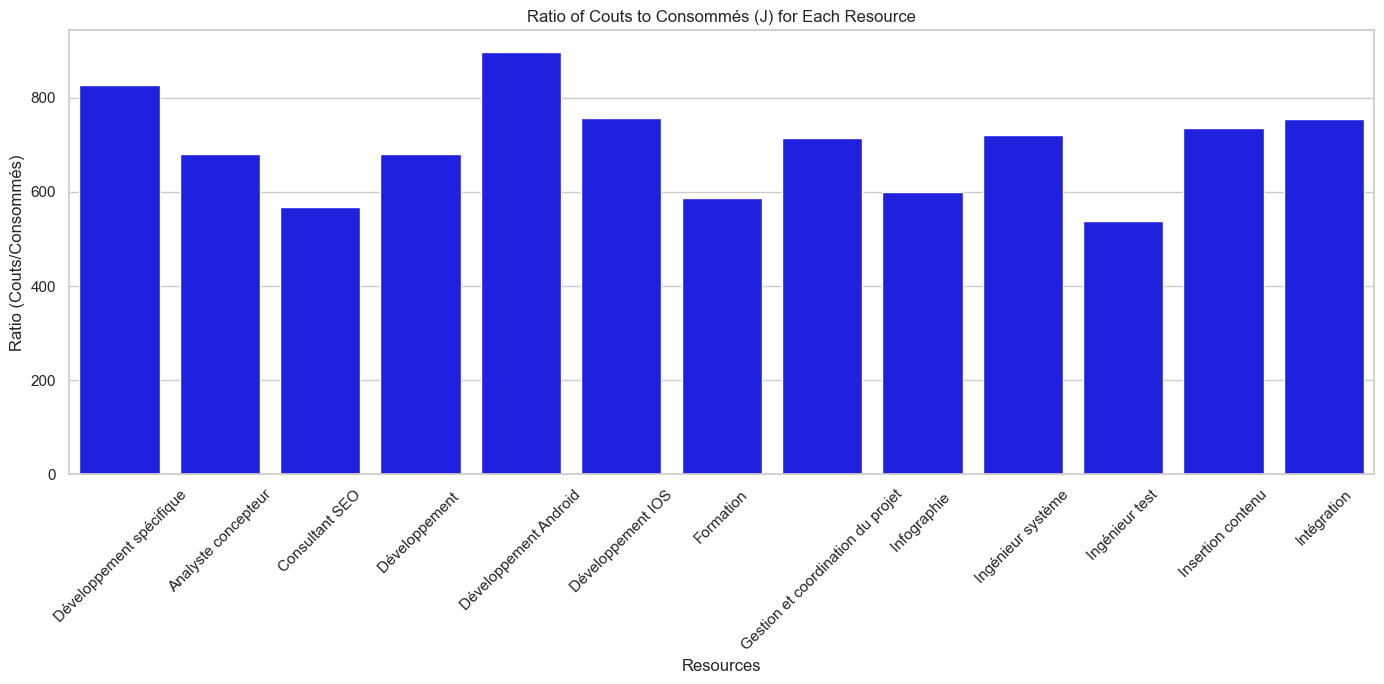

In [18]:
# Step 2: Group by 'Ressource' to aggregate data
# Exclude datetime columns and sum only numeric columns
numeric_columns = df.select_dtypes(include=[int, float]).columns.tolist()
df_grouped = df.groupby('Ressources')[['Couts', 'Consommés(J)']].sum().reset_index()

# Step 3: Calculate the ratio of 'Couts' to 'Consommés (J)'
df_grouped['Ratio (Couts/Consommés)'] = df_grouped['Couts'] / df_grouped['Consommés(J)']

# Display the aggregated dataframe with the ratio
print(df_grouped)

# Step 4: Create the chart
# Set the figure size and style
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Create a bar plot for the ratio
sns.barplot(x="Ressources", y="Ratio (Couts/Consommés)", data=df_grouped, color='blue')

# Add titles and labels
plt.title("Ratio of Couts to Consommés (J) for Each Resource")
plt.xlabel("Resources")
plt.ylabel("Ratio (Couts/Consommés)")

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()